# Problem of a Self-Gravitating Scalar Field by Christodoulou
##  Geoff Cope
##  Univeristy of Utah
##  December 26, 2021

https://link.springer.com/article/10.1007/BF01205930

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,r,theta,phi,du,dr,dtheta,dphi = symbols( 'u r theta phi du dr dtheta dphi' ) 

In [4]:
nu = Function('nu')(u,r)
nu

In [5]:
Lambda = Function('lambda')(u,r)
Lambda

In [7]:
variables = Matrix( [u,r,theta,phi] )
variables

⎡u⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣φ⎦

In [8]:
differentials = Matrix( [du,dr,dtheta,dphi] )
differentials

⎡  du  ⎤
⎢      ⎥
⎢  dr  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣ dphi ⎦

In [9]:
lineElement = expand(-exp(2*nu)*du**2 - 2*exp(nu+Lambda)*du*dr + r**2 * (dtheta**2 + sin(theta)**2 * dphi**2))
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡     2⋅ν(u, r)        λ(u, r)  ν(u, r)                ⎤
⎢   -ℯ               -ℯ       ⋅ℯ         0       0     ⎥
⎢                                                      ⎥
⎢  λ(u, r)  ν(u, r)                                    ⎥
⎢-ℯ       ⋅ℯ                 0           0       0     ⎥
⎢                                                      ⎥
⎢                                         2            ⎥
⎢        0                   0           r       0     ⎥
⎢                                                      ⎥
⎢                                             2    2   ⎥
⎣        0                   0           0   r ⋅sin (θ)⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡     2⋅ν(u, r)        λ(u, r)  ν(u, r)                ⎤
⎢   -ℯ               -ℯ       ⋅ℯ         0       0     ⎥
⎢                                                      ⎥
⎢  λ(u, r)  ν(u, r)                                    ⎥
⎢-ℯ       ⋅ℯ                 0           0       0     ⎥
⎢                                                      ⎥
⎢                                         2            ⎥
⎢        0                   0           r       0     ⎥
⎢                                                      ⎥
⎢                                             2    2   ⎥
⎣        0                   0           0   r ⋅sin (θ)⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("u r theta phi")
u,r,theta,phi = syms

In [16]:
metric = MetricTensor(m,syms)

In [18]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢⎡   -λ(u, r) + ν(u, r) ∂             ∂             ∂                                       
⎢⎢- ℯ                  ⋅──(ν(u, r)) + ──(λ(u, r)) + ──(ν(u, r))  0            0             
⎢⎢                      ∂r            ∂u            ∂u                                      
⎢⎢                                                                                          
⎢⎢                              0                                0            0             
⎢⎢                                                                                          
⎢⎢                                                                     -λ(u, r) - ν(u, r)   
⎢⎢                              0                                0  r⋅ℯ                     
⎢⎢                                                                                          
⎢⎢                                                                    

In [20]:
Ric = RicciTensor.from_metric(metric)
simplify(Ric.tensor())

⎡⎛    ⎛            2                         2                                              
⎢⎜    ⎜ λ(u, r)   ∂               λ(u, r)   ∂               ν(u, r) ∂           ∂           
⎢⎜- r⋅⎜ℯ       ⋅─────(λ(u, r)) + ℯ       ⋅─────(ν(u, r)) + ℯ       ⋅──(λ(u, r))⋅──(ν(u, r)) 
⎢⎜    ⎜         ∂u ∂r                     ∂u ∂r                     ∂r          ∂r          
⎢⎝    ⎝                                                                                     
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                  ⎛    ⎛            2                         2                            
⎢                  ⎜    ⎜ λ(u, r)   ∂               λ(u, r)   ∂               ν(u, r) ∂     
⎢                  ⎜- r⋅⎜ℯ       ⋅─────(λ(u, r)) + ℯ       ⋅─────(ν(u,

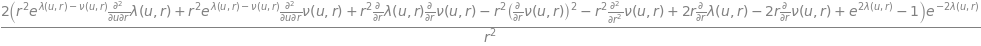

In [21]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [22]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡⎛    ⎛            2                         2                                              
⎢⎜    ⎜ λ(u, r)   ∂               λ(u, r)   ∂               ν(u, r) ∂           ∂           
⎢⎜- r⋅⎜ℯ       ⋅─────(λ(u, r)) + ℯ       ⋅─────(ν(u, r)) + ℯ       ⋅──(λ(u, r))⋅──(ν(u, r)) 
⎢⎜    ⎜         ∂u ∂r                     ∂u ∂r                     ∂r          ∂r          
⎢⎝    ⎝                                                                                     
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                    ⎛  ⎛              2                         2                          
⎢                    ⎜  ⎜   λ(u, r)   ∂               λ(u, r)   ∂     

In [23]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡            ⎡                                                                              
⎢            ⎢                                                                              
⎢            ⎢                                                                        0     
⎢            ⎢                                                                              
⎢            ⎢                                                                              
⎢            ⎢                                                                              
⎢            ⎢⎛            2                         2                                      
⎢            ⎢⎜ λ(u, r)   ∂               λ(u, r)   ∂               ν(u, r) ∂           ∂   
⎢            ⎢⎜ℯ       ⋅─────(λ(u, r)) + ℯ       ⋅─────(ν(u, r)) + ℯ       ⋅──(λ(u, r))⋅──(ν
⎢            ⎢⎜         ∂u ∂r                     ∂u ∂r                     ∂r          ∂r  
⎢            ⎢⎝                                                       

In [24]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     